In [103]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from ta.trend import ADXIndicator
from ta.volatility import BollingerBands
import numpy as np


In [104]:


ticker = "^NSEI"  # NIFTY 50 index on Yahoo Finance

end_date = datetime.today().strftime('%Y-%m-%d')

#Currently using the last 10 years data will use more for simulations
start_date = (datetime.today() - timedelta(days=3650)).strftime('%Y-%m-%d')  

nifty_data = yf.download(ticker, start=start_date, end=end_date, interval='1d')

print("Fetched Data (first 5 rows):")
print(nifty_data.head())

csv_file = "nifty_50_10_years_data.csv"
nifty_data.to_csv(csv_file)


[*********************100%***********************]  1 of 1 completed

Fetched Data (first 5 rows):
Price         Adj Close        Close         High          Low         Open  \
Ticker            ^NSEI        ^NSEI        ^NSEI        ^NSEI        ^NSEI   
Date                                                                          
2014-12-16  8067.600098  8067.600098  8189.350098  8052.600098  8172.600098   
2014-12-17  8029.799805  8029.799805  8082.000000  7961.350098  8041.200195   
2014-12-18  8159.299805  8159.299805  8174.299805  8084.899902  8138.899902   
2014-12-19  8225.200195  8225.200195  8263.450195  8208.599609  8230.450195   
2014-12-22  8324.000000  8324.000000  8330.950195  8228.200195  8255.000000   

Price       Volume  
Ticker       ^NSEI  
Date                
2014-12-16  197300  
2014-12-17  216200  
2014-12-18  162100  
2014-12-19  174800  
2014-12-22  139200  


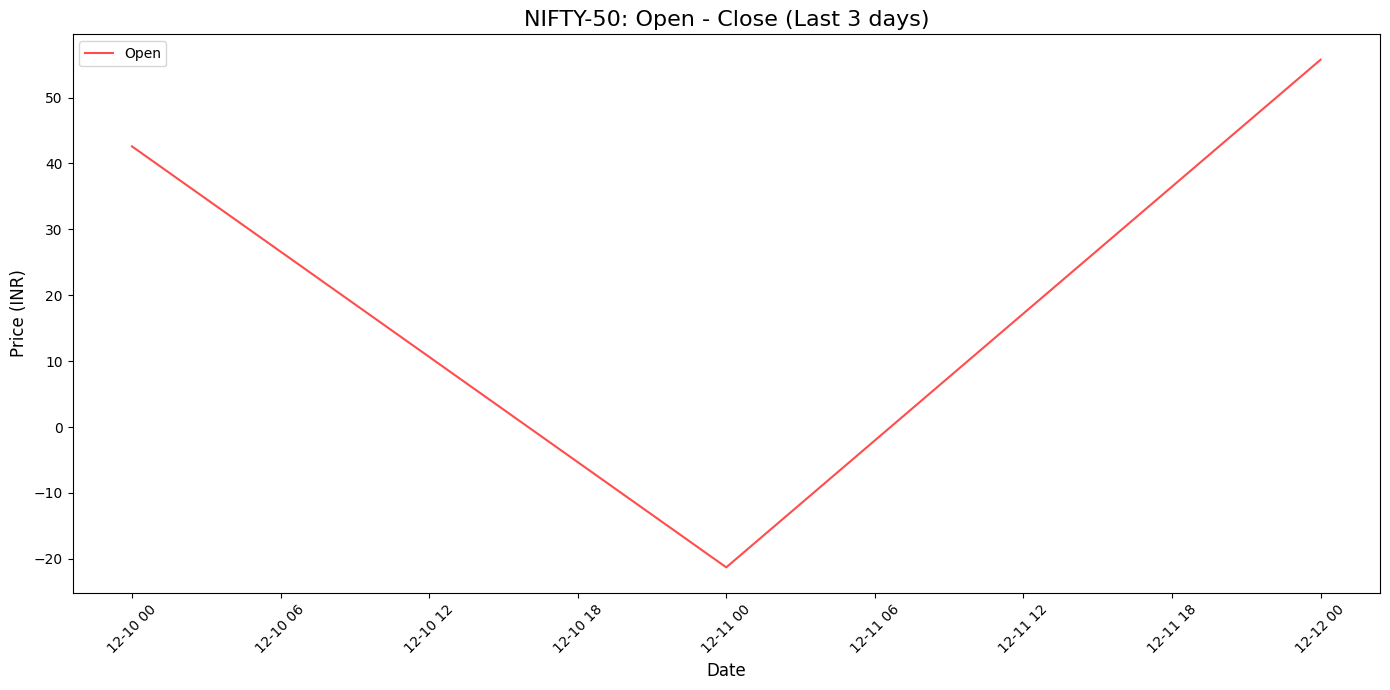

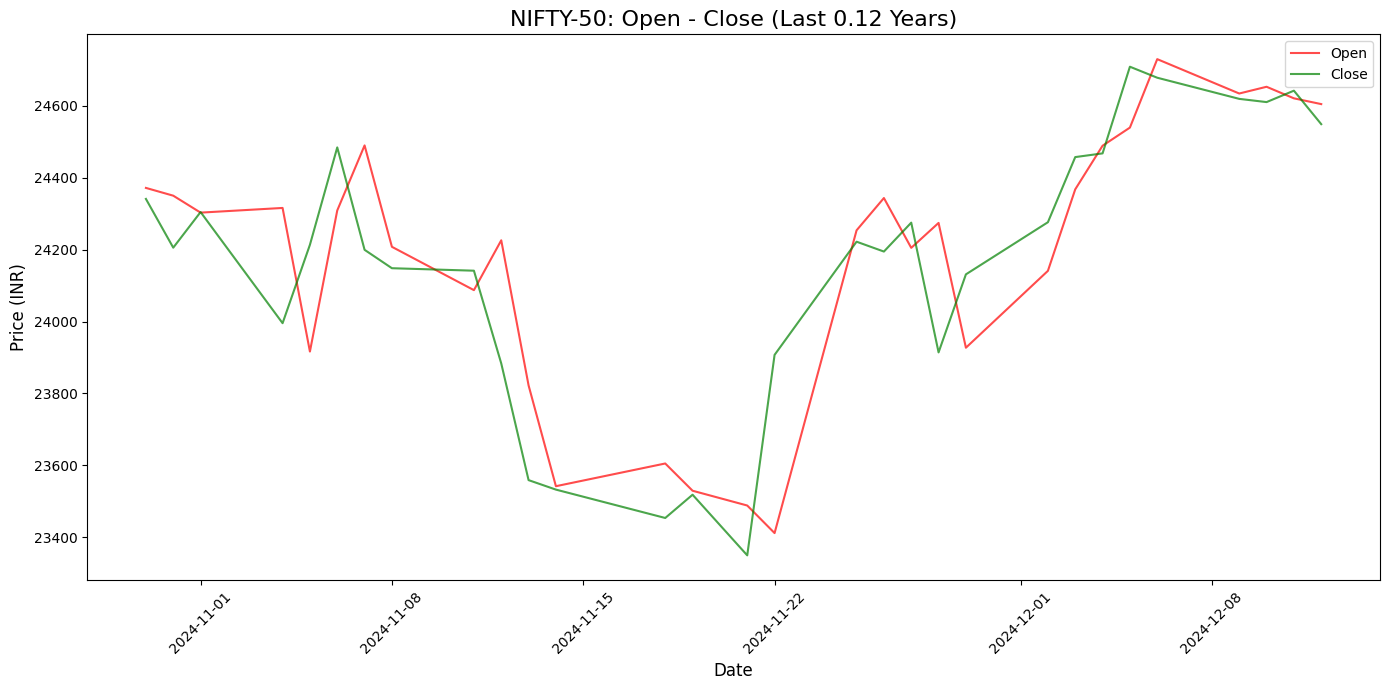

In [105]:

def plot_open_close(data, years=10):
    data = data.tail(int(years * 252))  
    plt.figure(figsize=(14, 7))
    plt.plot(data.index, data['Open']-data['Close'], label='Open', color='red', alpha=0.7)
    #plt.plot(data.index, data['Close'], label='Close', color='green', alpha=0.7)

    plt.title(f'NIFTY-50: Open - Close (Last {int(years*252)} days)', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Price (INR)', fontsize=12)
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

def plot_open_and_close(data,years=10):
    data = data.tail(int(years * 252))  
    plt.figure(figsize=(14, 7))
    plt.plot(data.index, data['Open'], label='Open', color='red', alpha=0.7)
    plt.plot(data.index, data['Close'], label='Close', color='green', alpha=0.7)

    plt.title(f'NIFTY-50: Open - Close (Last {years} Years)', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Price (INR)', fontsize=12)
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_open_close(nifty_data,0.012)
plot_open_and_close(nifty_data,0.12)
# The plot appears random for a period of 0.12 years (approximately 30 days). 
# My initial assumption is that, for a given day, the likelihood of a stock increasing or decreasing 
# is similar to a coin flip. I will explore a formal statistical proof for this hypothesis later.

   

In [106]:
nifty_data['open_close_diff'] = nifty_data['Close'] - nifty_data['Open']
nifty_data.tail(10)



Price,Adj Close,Close,High,Low,Open,Volume,open_close_diff
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI,
Date,,,,,,,
2024-11-29,24131.099609,24131.099609,24188.449219,23927.150391,23927.150391,282100,203.949219
2024-12-02,24276.050781,24276.050781,24301.699219,24008.650391,24140.849609,220400,135.201172
2024-12-03,24457.150391,24457.150391,24481.349609,24280.000000,24367.500000,339500,89.650391
2024-12-04,24467.449219,24467.449219,24573.199219,24366.300781,24488.750000,348000,-21.300781
2024-12-05,24708.400391,24708.400391,24857.750000,24295.550781,24539.150391,361500,169.250000
2024-12-06,24677.800781,24677.800781,24751.050781,24620.500000,24729.449219,226700,-51.648438
2024-12-09,24619.000000,24619.000000,24705.000000,24580.050781,24633.900391,248100,-14.900391
2024-12-10,24610.050781,24610.050781,24677.800781,24510.650391,24652.650391,261000,-42.599609


In [107]:
profits = [i for i in nifty_data['open_close_diff'] if i > 0]
losses = [i for i in nifty_data['open_close_diff'] if i < 0]

print(f'number of profitable days :  {len(profits)} \t total profit : {sum(profits)}')
print(f'number of lossy days : {len(losses)} \t total loss : {sum(losses)}')
print(f'total profit (diffrencing sum of profitable days and lossy dasy) : {sum(profits) - abs(sum(losses))}')
print()
initial_close = nifty_data.iloc[0]['Adj Close'].values[0]
final_close = nifty_data.iloc[-1]['Adj Close'].values[0]
print(f'initial close : {initial_close} \nfinal close : {final_close} \ndifference (total profit if just bought and held): {final_close - initial_close}') # Stratergy 1

# I see a intresting observation that 'close' of a day is not the same as 'open' of the next day
# Additionally, we observe that following a strategy (stratergy 2) of buying at market open and selling at market close 
# every day over a 10-year period results in a negative profit.


number of profitable days :  1146 	 total profit : 81817.0263671875
number of lossy days : 1311 	 total loss : -105881.12353515625
total profit (diffrencing sum of profitable days and lossy dasy) : -24064.09716796875

initial close : 8067.60009765625 
final close : 24548.69921875 
difference (total profit if just bought and held): 16481.09912109375


In [108]:
# To address this, we calculate the change in price between trading days by taking the difference 
# between Open[i] and Close[i-1]. This is referred to as 'overnight change,' as it reflects the 
# price movement that occurs outside regular trading hours in the daily data.



nifty_data['overnight change'] = nifty_data['Open'] - nifty_data['Close'].shift(1)

nifty_data.head(10)

Price,Adj Close,Close,High,Low,Open,Volume,open_close_diff,overnight change
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI,,
Date,,,,,,,,
2014-12-16,8067.600098,8067.600098,8189.350098,8052.600098,8172.600098,197300,-105.000000,NaN
2014-12-17,8029.799805,8029.799805,8082.000000,7961.350098,8041.200195,216200,-11.400391,-26.399902
2014-12-18,8159.299805,8159.299805,8174.299805,8084.899902,8138.899902,162100,20.399902,109.100098
2014-12-19,8225.200195,8225.200195,8263.450195,8208.599609,8230.450195,174800,-5.250000,71.150391
2014-12-22,8324.000000,8324.000000,8330.950195,8228.200195,8255.000000,139200,69.000000,29.799805
2014-12-23,8267.000000,8267.000000,8364.750000,8252.849609,8324.599609,132200,-57.599609,0.599609
2014-12-24,8174.100098,8174.100098,8286.400391,8155.250000,8272.049805,221900,-97.949707,5.049805
2014-12-26,8200.700195,8200.700195,8234.549805,8147.950195,8204.799805,75500,-4.099609,30.699707


In [109]:


profit_due_to_overnightChange = nifty_data['overnight change'].sum()
print(f'profit due to overnight change : {profit_due_to_overnightChange}')


# Strategy 3: A potential approach is to buy at the market open on day i and sell at the market close on day i+1. 
# This allows us to take advantage of market changes that occur between trading days.




strategy_results = pd.DataFrame(index = nifty_data.index)
strategy_results['strategy3'] = (
    nifty_data['Close'].shift(-1) - nifty_data['Open']  # Close[i+1] - Open[i]
)

print(f'results of strategy3 : \nProfit : {strategy_results["strategy3"].sum()}')
strategy3_profits = [i for i in strategy_results['strategy3'] if i > 0]
strategy3_losses = [i for i in strategy_results['strategy3'] if i < 0]

print(f'lossy days count = {len(strategy3_losses)}, sum of all losses = {sum(strategy3_losses)}')
print(f'profitable days count = {len(strategy3_profits)}, sum of all profits = {sum(strategy3_profits)}')

print("EVEN IF IF BOOK MORE PROFITABLE TRADES THE LOSSES ARE HIGH AND WE END UP NEGATIVE")
print("This may be because the time market is closed is much more than its opened window so alot happens in that time\nthat may or may not be profitable")

profit due to overnight change : 40440.1962890625
results of strategy3 : 
Profit : -7527.248046875
lossy days count = 1187, sum of all losses = -153720.853515625
profitable days count = 1270, sum of all profits = 146193.60546875
EVEN IF IF BOOK MORE PROFITABLE TRADES THE LOSSES ARE HIGH AND WE END UP NEGATIVE
This may be because the time market is closed is much more than its opened window so alot happens in that time
that may or may not be profitable


### Rethinking the Approach

Instead of merely experimenting with various strategies, I will now focus on analyzing each successful or failed strategy in depth. The goal is to understand *why* a strategy worked or failed, allowing for more informed decision-making and continuous improvement.


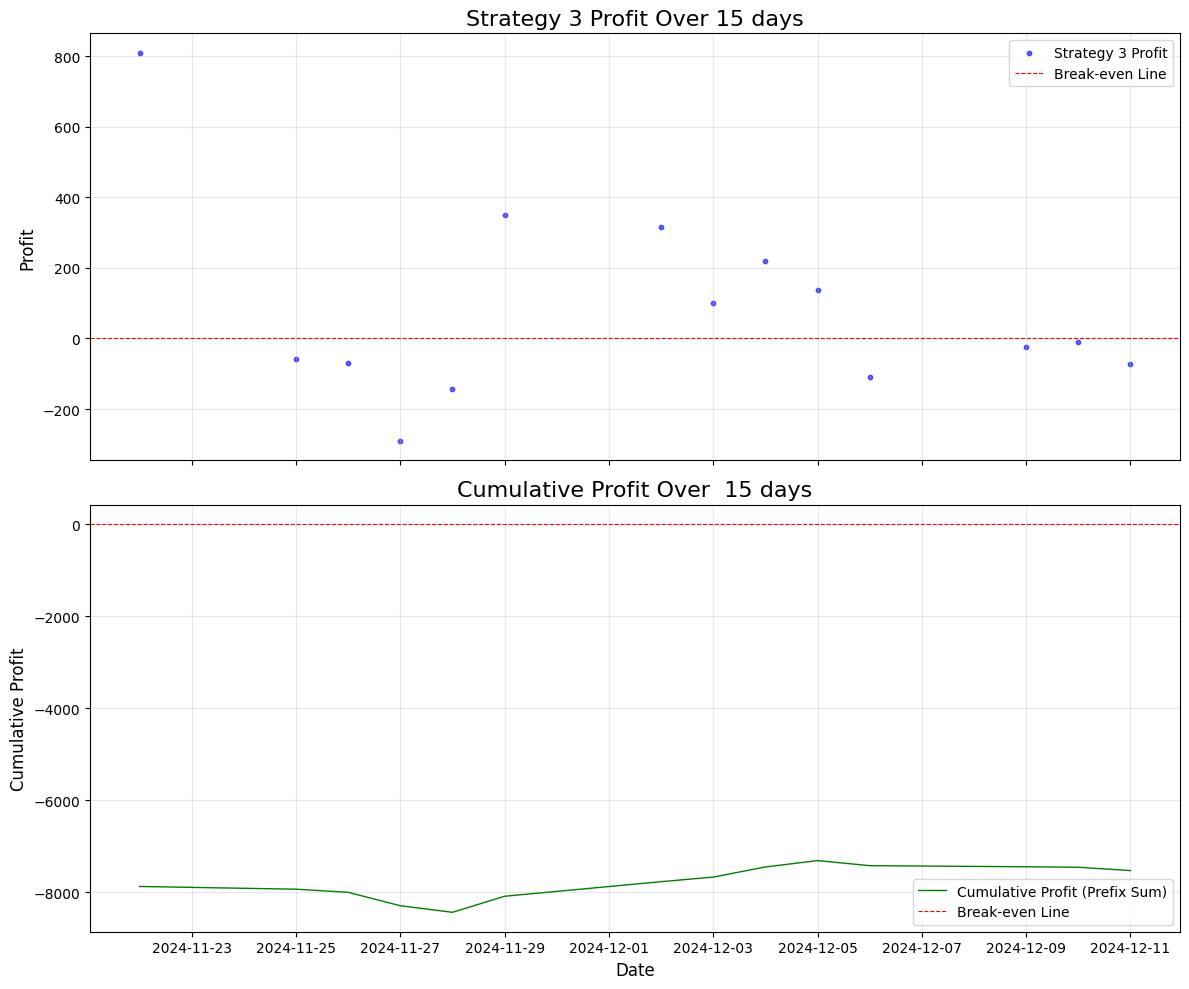

In [110]:
# Plotting stragey3

strategy_results['strategy3_progression'] = strategy_results['strategy3'].cumsum()

def plot_strategy_3(years = 10):
    data = strategy_results.tail(int(years * 252))
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10), sharex=True)
    axes[0].scatter(data.index, data['strategy3'], label="Strategy 3 Profit", color='blue', s = 10,alpha=0.6)
    axes[0].set_title(f'Strategy 3 Profit Over {int(years * 252)} days', fontsize=16)
    axes[0].set_ylabel("Profit", fontsize=12)
    axes[0].axhline(y=0, color='red', linestyle='--', linewidth=0.8, label="Break-even Line")
    axes[0].legend()
    axes[0].grid(alpha=0.3)

    axes[1].plot(data.index, data['strategy3_progression'], label="Cumulative Profit (Prefix Sum)", color='green', linewidth=1)
    axes[1].set_title(f"Cumulative Profit Over  {int(years * 252)} days", fontsize=16)
    axes[1].set_xlabel("Date", fontsize=12)
    axes[1].set_ylabel("Cumulative Profit", fontsize=12)
    axes[1].axhline(y=0, color='red', linestyle='--', linewidth=0.8, label="Break-even Line")
    axes[1].legend()
    axes[1].grid(alpha=0.3)

    plt.tight_layout()
    plt.show()
plot_strategy_3(0.06)

## Results 

These plots make it clear that the daily trading approach relies heavily on daily price fluctuations, which resemble coin flips. This strategy disregards the stock's long-term performance and depends largely on luck.



## Strategy 4 and Updates

I’ve realized that without a clear timeframe for trading and the necessary capital or hardware for high-frequency trading (HFT), certain strategies aren’t feasible for me right now. Since I also lack minute or hourly interval data, intraday trading is off the table too.

After considering these limitations, I’ve decided to focus on building a model aimed at generating stable, long-term returns—specifically over 10% annually. My approach will involve analyzing daily index movements and making thoughtful, informed decisions based on that data.


(2401, 3)
Price              Close        ADX  Market_Type
Ticker             ^NSEI                        
Date                                            
2024-12-06  24677.800781  24.253231  Range-Bound
2024-12-09  24619.000000  23.673277  Range-Bound
2024-12-10  24610.050781  22.826171  Range-Bound
2024-12-11  24641.800781  22.089887  Range-Bound
2024-12-12  24548.699219  21.138372  Range-Bound


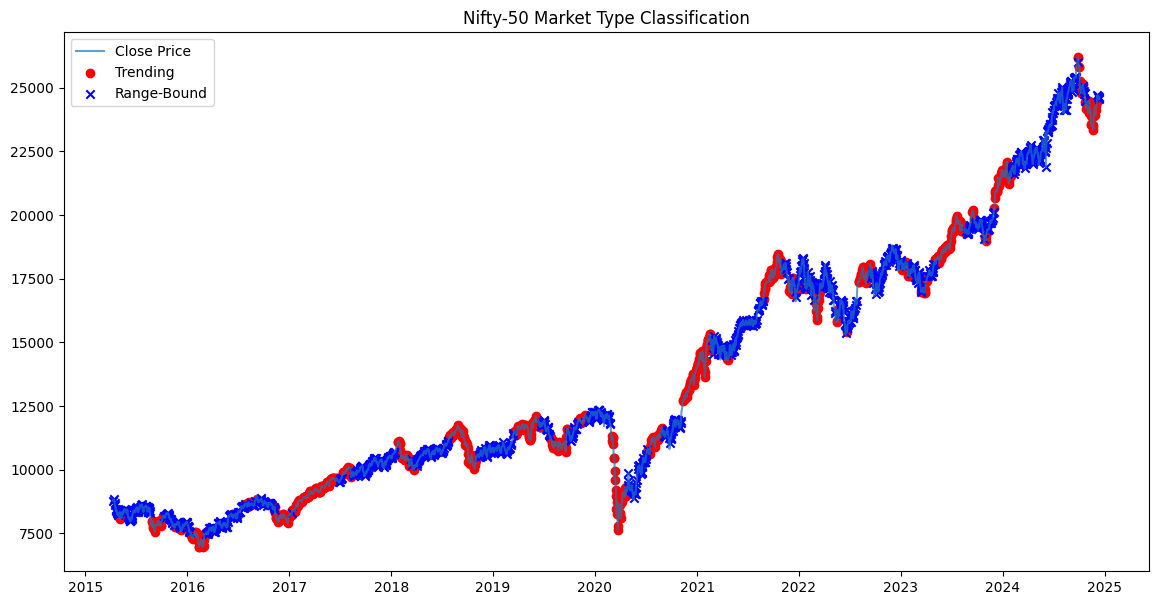

In [ ]:
# Firstly lets check if the Market is trending , range-bound or uncertain 


def calculate_adx(data, window=14):
    high = data['High'].squeeze()
    low = data['Low'].squeeze()
    close = data['Close'].squeeze()
    adx_indicator = ADXIndicator(high=high, low=low, close=close, window=window)
    data['ADX'] = adx_indicator.adx()
    return data

def calculate_bollinger_bands(data, window=20):
    close = data['Close'].squeeze()
    bb_indicator = BollingerBands(close=close, window=window, window_dev=2)
    data['BB_Upper'] = bb_indicator.bollinger_hband()
    data['BB_Lower'] = bb_indicator.bollinger_lband()
    data['BB_Range'] = data['BB_Upper'] - data['BB_Lower']  
    return data

def classify_market(data, adx_threshold=25):
    conditions = []
    for i, row in data.iterrows():
        if row['ADX'].values[0] > adx_threshold:
            conditions.append("Trending")
        elif row['Close'].values[0] > row['BB_Lower'].values[0] and row['Close'].values[0] < row['BB_Upper'].values[0]:
            conditions.append("Range-Bound")
        else:
            conditions.append("Uncertain")
    data['Market_Type'] = conditions
    return data

def plot_market_type(data,days=10):
    data = data.tail(int(252 * days))
    plt.figure(figsize=(14, 7))
    plt.plot(data['Close'], label="Close Price", alpha=0.7)
    plt.scatter(data.index[data['Market_Type'] == 'Trending'], data['Close'][data['Market_Type'] == 'Trending'], label="Trending", marker="o", color="red")
    plt.scatter(data.index[data['Market_Type'] == 'Range-Bound'], data['Close'][data['Market_Type'] == 'Range-Bound'], label="Range-Bound", marker="x", color="blue")
    plt.title(f'Nifty-50 Market Type Classification for past {int(252 * days)}')
    plt.legend()
    plt.show()

    
    
    
 

#print(nifty_data[['High','Close','Low']].shape)   
#print(nifty_data['Close'])
#print(nifty_data['High'])
#print(nifty_data['Low'])
nifty_data_copy = nifty_data.copy()
nifty_data = calculate_adx(nifty_data)
print(nifty_data[['Close','Open','ADX']].shape)
nifty_data = calculate_bollinger_bands(nifty_data)
nifty_data = nifty_data.dropna()
nifty_data.head()
nifty_data = classify_market(nifty_data)
print(nifty_data[['Close','ADX','Market_Type']].tail())
plot_market_type(nifty_data)